# Initialising

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive

Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
#Imports 
!pip install catboost
import lightgbm as lgb
import catboost as cat
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
random_seed = 42

     |████████████████████████████████| 66.3MB 58kB/s 


# Data Preparation

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.columns)
print(test.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [4]:
print("Number of NA Train for the variable budget : \n" + str(train[train.budget == 0].shape[0]) + "\n")
print("Number of NA Test for the variable budget : \n" + str(test[test.budget == 0].shape[0]))

Number of NA Train for the variable budget : 
812

Number of NA Test for the variable budget : 
1211


In [5]:
### Fixing budget and revenue values from official sources

train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [6]:
train.to_csv('trainUpdated.csv')
test.to_csv('testUpdated.csv')

In [7]:
TrainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv')
TestAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv')
print(TrainAdditionalFeatures.columns)
print(TestAdditionalFeatures.columns)

Index(['imdb_id', 'popularity2', 'rating', 'totalVotes'], dtype='object')
Index(['imdb_id', 'popularity2', 'rating', 'totalVotes'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def get_json_dict(df):
    global json_cols
    result = {}
    for e_col in json_cols:
        d = {}
        rows = df[e_col].values
        for row in rows:
            if row is None:
                continue
            if type(row) is str:
                for i in get_dictionary(row):
                    if i['name'] not in d:
                        d[i['name']] = 0
                    d[i['name']] += 1
        result[e_col] = d
    return result

def get_dictionary(s):
    try:
        i = eval(s)
    except:
        i = {}
    return i

def prepare(df, interpolateBudgetByMedian = False):
    global json_cols
    global train_dict
    
    df[['release_month', 'release_day', 'release_year']] = df['release_date'].str.split('/', expand=True).replace(np.nan, 0).astype(int)
    df[['release_month', 'release_day', 'release_year']] = df[['release_month', 'release_day', 'release_year']].replace(0, df[['release_month', 'release_day', 'release_year']].mean())
    df['release_year'].map(lambda x : x if x > 100 else x + (2000 if (x <= 18) else 1900))

    releaseDate = pd.to_datetime(df['release_date'])
    df['release_dayofweek'] = releaseDate.dt.dayofweek
    df['release_quarter'] = releaseDate.dt.quarter
    df['rating'] = df['rating'].replace(0, np.nan)
    df['rating'] = df.rating.fillna(df['rating'].median())

    df['totalVotes'] = df['totalVotes'].replace(0, np.nan)
    df['totalVotes'] = df.totalVotes.fillna(df['rating'].median())
    df['totalVotes'] = df['totalVotes'].clip(lower=1)
    df['rating'] = df['rating'].clip(lower=1, upper = 10)
    df['weightedRating'] = np.log(df['rating'] * df['totalVotes'])    # Weighted Rating log

    df['genders_0_crew'] = df['crew'].map(lambda x : sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].map(lambda x : sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].map(lambda x : sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
    
    df['_collection_name'] = df['belongs_to_collection'].map(lambda x : [i['name'] for i in get_dictionary(x)]) # Collection name
    df['_collection_name'] = le.fit_transform(list(df['_collection_name'].fillna('').astype(str)))
    df['_num_Keywords'] = df['Keywords'].map(lambda x : len(eval(x)) if get_dictionary(x) != {} else 0) # Key word number of Movie
    df['_num_cast'] = df['cast'].map(lambda x : len(eval(x)) if get_dictionary(x) != {} else 0) # Cast number of people
    
    df['_popularity_mean_year'] = df['popularity'] / df.groupby('release_year')['popularity'].transform('mean') # Popularity by Year

    df['runtime'] = df['runtime'].replace(0, np.nan)
    df['runtime'] = df.rating.fillna(df['runtime'].median())
    df['runtime'] = df['runtime'].clip(lower=1) # Fixing null values in runtime
    
    if(interpolateBudgetByMedian):
      df['budget'] = df['budget'].replace(0, df['budget'].median())
      df['budget'] = np.log1p(df['budget'])
      df['_budget_runtime_ratio'] = df.budget / df.runtime
      df['meanBudgetByYear'] = df.groupby('release_year')['budget'].transform('mean')    # Mean Budget By Release Year
      df['medianBudgetByYear'] = df.groupby('release_year')['budget'].transform('median')    # Median Budget By Release Year

    df['_release_year_popularity_ratio'] = df.release_year / df.popularity
    df['_release_year_polularity_ratio2'] = df.popularity / df.release_year
    df['_popularity_totalVote_ratio'] = df.totalVotes / df.popularity
    df['_rating_popularity_ratio'] = df.rating / df.popularity
    df['_rating_totalVotes_ratio'] = df.totalVotes / df.rating
    df['_totalVotes_releaseYear_ratio'] = df.totalVotes / df.release_year
    
    df['has_homepage'] = 1  # Has Homepage one hot encoding
    df.loc[df['homepage'].isnull(), 'has_homepage'] = 0
  
    df['isbelongs_to_collectionNA'] = 0  # is belongs to collection one hot encoding, belongs_to_collectionNa = 0
    df.loc[df['belongs_to_collection'].isnull(), 'isbelongs_to_collectionNA'] = 1
  
    df['isTaglineNA'] = 0   # Tagline one hot encoding
    df.loc[df['tagline'].isnull(), 'isTaglineNA'] = 1
  
    df['isOriginalLanguage'] = 0   # original_language one hot encoding, en = 1, other = 0
    df.loc[df['original_language'] == 'en', 'isOriginalLanguage'] = 1
    
    # original_title one hot encoding
    # isTitleDifferent = 1
    # The Title and the original_title are the same
    df['isTitleDifferent'] = 1
    df.loc[df['original_title'] == df['title'], 'isTitleDifferent'] = 0
    
    # Movie Released and Rumored one hot encoding
    # Movie Released = 0 Rumored = 1
    df['isMovieReleased'] = 1
    df.loc[df['status'] == 'Released', 'isMovieReleased'] = 0
    
    # get collection id
    df['collection_id'] = df['belongs_to_collection'].map(lambda x : np.nan if len(get_dictionary(x)) == 0 else get_dictionary(x)[0]['id'])   
    # Original Title Letter Count
    df['original_title_letter_count'] = df['original_title'].str.len()
    # Original Title Word Count
    df['original_title_word_count'] = df['original_title'].str.split().str.len()  
    # Title Word Count
    df['title_word_count'] = df['title'].str.split().str.len()    
    # Tagline Word Count
    df['tagline_word_count'] = df['tagline'].str.split().str.len()  
    # Production Countries Count
    df['production_countries_count'] = df['production_countries'].map(lambda x : len(get_dictionary(x))) 
    # Cast Count
    df['cast_count'] = df['cast'].map(lambda x : len(get_dictionary(x)))
    # Crew Count
    df['crew_count'] = df['crew'].map(lambda x : len(get_dictionary(x)))
    # Mean Runtime By Release Year
    df['meanruntimeByYear'] = df.groupby('release_year')['runtime'].transform('mean').round()
    # Mean Popularity By Release Year
    df['meanPopularityByYear'] = df.groupby('release_year')['popularity'].transform('mean').round()
    # Mean Total Votes By Release Year
    df['meanTotalVotesByYear'] = df.groupby('release_year')['totalVotes'].transform('mean').round()
    # Mean Totalvotes By Rating
    df['meanTotalVotesByRating'] = df.groupby('rating')['totalVotes'].transform('mean').round()
    # get_dummies
    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies']:
        df[col] = df[col].map(lambda x : sorted(list(set([n if n in train_dict['genres'] else 'genres' + '_etc' for n in [i['name'] for i in get_dictionary(x)]])))).map(lambda x : ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False) 

    df.drop(['genres_etc'], axis=1, inplace=True)
    df = df.drop(['id', 'revenue', 'belongs_to_collection',
                         'genres', 'homepage', 'imdb_id', 'overview',
                         'poster_path', 'production_companies',
                         'production_countries', 'release_date', 'spoken_languages',
                         'status', 'title', 'Keywords', 'cast', 'crew',
                         'original_language', 'original_title', 'tagline',
                         'collection_id'], axis=1)
    
    df.fillna(value=0.0, inplace=True)
    print(df.loc[df.budget==0].shape[0])
    return df

Without additional data

In [9]:
train = pd.read_csv("trainUpdated.csv")
test = pd.read_csv("testUpdated.csv")
test['revenue'] = np.nan

TrainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv')
TestAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv')
train = pd.merge(train, TrainAdditionalFeatures, how = 'left', on = ['imdb_id'])
test = pd.merge(test, TestAdditionalFeatures, how = 'left', on = ['imdb_id'])

train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values    
     
json_cols = ['genres', 'production_companies', 'production_countries',
             'spoken_languages', 'Keywords', 'cast', 'crew']

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

for col in json_cols:
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   

    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]

all_data = prepare(pd.concat([train, test]).reset_index(drop = True), interpolateBudgetByMedian=True)
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 
train['revenue'] = y    

train.to_csv('encodedData_train.csv')
test.to_csv('encodedData_test.csv')

0


With additional data

In [10]:
train = pd.read_csv("trainUpdated.csv")
test = pd.read_csv("testUpdated.csv")
test['revenue'] = np.nan

TrainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv')
TestAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv')

train = pd.merge(train, TrainAdditionalFeatures, how='left', on = ['imdb_id'])
test = pd.merge(test, TestAdditionalFeatures, how='left', on = ['imdb_id'])

additionalTrainData = pd.read_csv('additionalTrainData.csv')
additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
train = pd.concat([train, additionalTrainData])
train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values    
     
json_cols = ['genres', 'production_companies', 'production_countries',
             'spoken_languages', 'Keywords', 'cast', 'crew']

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

for col in json_cols:
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   

    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]

all_data = prepare(pd.concat([train, test]).reset_index(drop = True), interpolateBudgetByMedian=True)
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 

train['revenue'] = y    
train.to_csv('encodedDataWithAdditionalData_train.csv')
test.to_csv('encodedDataWithAdditionalData_test.csv')

0


# PCA

In [11]:
train = pd.read_csv("ImputedData_encodedDataWithAdditionalData_train.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")
y = pd.read_csv("ImputedData_encodedDataWithAdditionalData_train.csv")['revenue']
train2 = train.drop(['originalBudget', '_budget_runtime_ratio', 'inflationBudget', 'meanBudgetByYear', 'medianBudgetByYear'], axis=1, errors="ignore")

In [12]:
from sklearn.preprocessing import StandardScaler
def scaleValuesZScore(trainX, trainY, valX, valY):
    scaler = StandardScaler()
    trainData = pd.concat([trainX, trainY], axis=1)
    valData = pd.concat([valX, valY], axis=1)
    scaledTrainData = scaler.fit_transform(trainData)
    scaledValData = scaler.transform(valData)
    scaledTrainX, scaledTrainY  = scaledTrainData[:,:-1], scaledTrainData[:,-1]
    scaledValX, scaledValY  = scaledValData[:,:-1], scaledValData[:,-1]
    return scaledTrainX, scaledTrainY, scaledValX, scaledValY, scaler

from sklearn.preprocessing import MinMaxScaler
def scaleValuesMaxMin(trainX, trainY, valX, valY):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    trainData = pd.concat([trainX, trainY], axis=1)
    valData = pd.concat([valX, valY], axis=1)
    scaledTrainData = scaler.fit_transform(trainData)
    scaledValData = scaler.transform(valData)
    scaledTrainX, scaledTrainY  = scaledTrainData[:,:-1], scaledTrainData[:,-1]
    scaledValX, scaledValY  = scaledValData[:,:-1], scaledValData[:,-1]
    return scaledTrainX, scaledTrainY, scaledValX, scaledValY, scaler

In [13]:
trainScaled, yScaled, _, _, fittedScaler = scaleValuesZScore(train2, y, train2, y)
from sklearn.decomposition import PCA
pca = PCA(n_components = 60)
pca.fit(trainScaled)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.explained_variance_ratio_

array([1.96030087e-01, 6.00363048e-02, 5.00202192e-02, 4.81865888e-02,
       4.32617855e-02, 3.44677510e-02, 3.34518483e-02, 2.99174555e-02,
       2.75918681e-02, 2.41536163e-02, 2.23097278e-02, 2.14116555e-02,
       2.07058228e-02, 2.02846342e-02, 1.88348140e-02, 1.81152501e-02,
       1.77366206e-02, 1.65501299e-02, 1.61623483e-02, 1.57392653e-02,
       1.55133600e-02, 1.51606243e-02, 1.40159971e-02, 1.34656907e-02,
       1.29097814e-02, 1.25962388e-02, 1.23603927e-02, 1.19109506e-02,
       1.14879772e-02, 1.12946969e-02, 1.09133255e-02, 1.02089218e-02,
       9.66856814e-03, 9.11908607e-03, 8.28961173e-03, 8.03856369e-03,
       7.67141831e-03, 7.00039488e-03, 6.56895331e-03, 6.50782686e-03,
       6.29633556e-03, 5.89563527e-03, 5.10363720e-03, 4.86558744e-03,
       4.36524364e-03, 4.20661566e-03, 3.66395938e-03, 3.44207406e-03,
       2.88074427e-03, 2.37963532e-03, 2.19238083e-03, 1.94845271e-03,
       1.54477424e-03, 1.43017626e-03, 6.55830362e-05, 4.88338541e-05,
      

In [15]:
pd.DataFrame(pca.components_, columns = train2.columns).head()

,budget,popularity,runtime,popularity2,rating,totalVotes,release_month,release_day,release_year,release_dayofweek,release_quarter,weightedRating,genders_0_crew,genders_1_crew,genders_2_crew,_collection_name,_num_Keywords,_num_cast,_popularity_mean_year,_release_year_popularity_ratio,_release_year_polularity_ratio2,_popularity_totalVote_ratio,_rating_popularity_ratio,_rating_totalVotes_ratio,_totalVotes_releaseYear_ratio,has_homepage,isbelongs_to_collectionNA,isTaglineNA,isOriginalLanguage,isTitleDifferent,isMovieReleased,original_title_letter_count,original_title_word_count,title_word_count,tagline_word_count,production_countries_count,cast_count,crew_count,meanruntimeByYear,meanPopularityByYear,meanTotalVotesByYear,meanTotalVotesByRating,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0.153103,0.104271,0.043890,0.258574,0.043890,0.177383,-0.128313,0.132002,-0.234173,-0.001303,0.008458,0.226514,0.187360,0.189436,0.236410,-0.100663,0.187304,0.221804,0.100590,-0.001826,0.144940,-0.001447,-0.001668,0.183215,0.120895,0.143711,-0.120435,-0.131217,0.123390,-0.088028,-0.233565,-0.048318,0.001680,-0.007550,0.095882,0.195769,0.221804,0.217967,-0.069092,0.079510,0.196767,0.077846,0.119659,0.101878,0.043114,0.081163,0.078643,-0.002400,0.113509,0.056445,0.066853,-0.005853,0.031582,0.057692,0.017811,0.054906,0.051215,0.078994,0.112731,0.030651,0.017903
1,0.011823,0.266651,0.238722,0.047464,0.238722,0.310532,0.173555,-0.118820,0.231074,-0.069731,0.041528,0.151619,0.044548,-0.022740,-0.019122,-0.026654,-0.045826,-0.032560,0.311382,-0.066074,0.107560,-0.065923,-0.066115,0.299286,0.183146,-0.008086,-0.047459,0.011537,-0.029947,0.026222,0.232576,0.122934,0.099703,0.108038,-0.051213,-0.171776,-0.032560,0.025265,0.183980,0.069405,-0.093949,0.245052,-0.041587,0.040877,0.028295,-0.147127,-0.068011,-0.044108,-0.162327,0.003975,0.017220,-0.055710,-0.036558,-0.069413,-0.056347,-0.048718,-0.132019,0.002949,-0.097241,-0.019945,-0.004771
2,0.003451,0.041720,0.167888,-0.009494,0.167888,0.022618,0.020314,0.011533,-0.004050,-0.011856,0.034503,0.035427,-0.017484,-0.007217,-0.021261,0.093666,0.002884,0.003593,0.022606,0.523512,-0.010304,0.523519,0.523530,0.013620,-0.011787,-0.002652,0.098558,-0.004771,0.003473,-0.001632,-0.004344,-0.074318,-0.070220,-0.068537,0.022769,-0.003181,0.003593,-0.019140,0.068321,0.051868,0.021208,0.136926,-0.055978,-0.060332,-0.030765,-0.030298,0.001366,0.098476,0.091425,-0.049548,-0.046148,0.009127,0.035848,-0.056868,0.095452,-0.008240,0.059243,-0.054645,-0.030871,0.015284,0.014873
3,-0.006469,-0.032338,-0.252791,0.026301,-0.252791,0.036601,-0.014137,-0.027462,0.024844,0.005126,-0.048984,-0.051857,0.000327,-0.026643,0.006234,-0.245367,-0.025159,-0.032994,0.006967,0.204753,0.047161,0.204770,0.204689,0.050741,0.090736,0.012782,-0.267068,-0.015145,0.028701,-0.014658,0.025641,0.309416,0.332449,0.327353,-0.004492,-0.020718,-0.032994,-0.000604,-0.108626,-0.097393,-0.072029,-0.215188,0.067856,0.176288,0.123658,0.061931,-0.075626,0.027642,-0.222249,0.178718,0.136323,-0.017683,-0.095130,0.071135,0.012528,-0.038989,-0.066718,0.112160,-0.042471,-0.046427,-0.037803
4,0.028335,0.106756,-0.291866,-0.001118,-0.291866,0.088493,0.080505,-0.092340,0.147378,-0.005180,-0.019382,0.020323,0.113313,0.065872,0.064803,-0.021642,-0.046014,-0.047470,0.159994,0.075044,0.060314,0.075099,0.075023,0.102220,0.045574,-0.051563,-0.016453,-0.107838,0.105818,-0.148928,0.146192,-0.305264,-0.341651,-0.363488,0.045343,-0.107922,-0.047470,0.106301,-0.030498,-0.024060,-0.110773,-0.211886,0.093705,-0.020518,-0.092216,-0.120459,0.046121,-0.124089,-0.179775,-0.098925,-0.018775,-0.061891,-0.116734,0.132062,-0.081452,0.062619,-0.131635,0.083272,0.141992,-0.085154,-0.023930


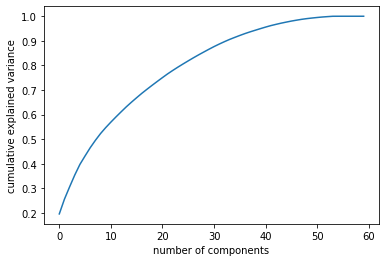

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.savefig("PCA.png")

# Imputing using KNN


without additional data

1977
No. of nulls in train: (796,)
No. of nulls in test: (1181,)


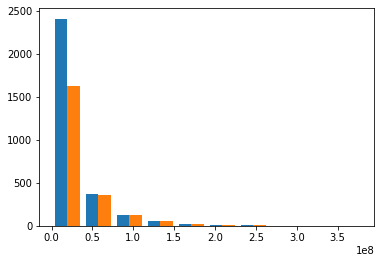

In [17]:
train = pd.read_csv("trainUpdated.csv").drop('Unnamed: 0', axis=1, errors="ignore")
test = pd.read_csv("testUpdated.csv").drop('Unnamed: 0', axis=1, errors="ignore")
test['revenue'] = np.nan

TrainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv').drop('Unnamed: 0', axis=1, errors="ignore")
TestAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv').drop('Unnamed: 0', axis=1, errors="ignore")
train = pd.merge(train, TrainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test, TestAdditionalFeatures, how='left', on=['imdb_id'])

train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values    
     
json_cols = ['genres', 'production_companies', 'production_countries',
             'spoken_languages', 'Keywords', 'cast', 'crew']

def get_json_dict(df):
    global json_cols
    result = {}
    for e_col in json_cols:
        d = {}
        rows = df[e_col].values
        for row in rows:
            if row is None: continue
            if type(row) is str:
                for i in get_dictionary(row):
                    if i['name'] not in d:
                        d[i['name']] = 0
                    d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

for col in json_cols:
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   

    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]

all_data = prepare(pd.concat([train, test]).reset_index(drop = True), interpolateBudgetByMedian=False)
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 
print(f"No. of nulls in train: {train.loc[train['budget'] == 0, 'budget'].shape}")
print(f"No. of nulls in test: {test.loc[test['budget'] == 0, 'budget'].shape}")

train.loc[train['budget'] == 0, 'budget'] = np.nan
test.loc[test['budget'] == 0, 'budget'] = np.nan

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
imputed_data = imputer.fit_transform(train)
plt.hist([imputed_data[:,0], train['budget']])

train['budget'] = imputed_data[:, 0]

imputed_data = imputer.fit_transform(test)
test['budget'] = imputed_data[:, 0]

train['originalBudget'] = train['budget']
train['inflationBudget'] = train['budget'] + train['budget'] * 1.8 / 100 * (2018 - train['release_year'])
train['budget'] = np.log1p(train['budget'])
train['_budget_runtime_ratio'] = train.budget / train.runtime
train['meanBudgetByYear'] = train.groupby('release_year')['budget'].transform('mean')
train['medianBudgetByYear'] = train.groupby('release_year')['budget'].transform('median')

test['originalBudget'] = test['budget']
test['inflationBudget'] = test['budget'] + test['budget'] * 1.8 / 100 * (2018 - test['release_year'])
test['budget'] = np.log1p(test['budget'])
test['_budget_runtime_ratio'] = test.budget / test.runtime
test['meanBudgetByYear'] = test.groupby('release_year')['budget'].transform('mean')
test['medianBudgetByYear'] = test.groupby('release_year')['budget'].transform('median')
train['revenue'] = y    
train.to_csv('ImputedData_encodedData_train.csv')
test.to_csv('ImputedData_encodedData_test.csv')

with additional data

In [18]:
train = pd.read_csv("trainUpdated.csv").drop('Unnamed: 0', axis=1, errors="ignore")
test = pd.read_csv("testUpdated.csv").drop('Unnamed: 0', axis=1, errors="ignore")
test['revenue'] = np.nan

TrainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv').drop('Unnamed: 0', axis=1, errors="ignore")
TestAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv').drop('Unnamed: 0', axis=1, errors="ignore")

train = pd.merge(train, TrainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test, TestAdditionalFeatures, how='left', on=['imdb_id'])
additionalTrainData = pd.read_csv('additionalTrainData.csv').drop('Unnamed: 0', axis=1, errors="ignore")
additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
train = pd.concat([train, additionalTrainData])
train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values    
     
json_cols = ['genres', 'production_companies', 'production_countries',
             'spoken_languages', 'Keywords', 'cast', 'crew']

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

for col in json_cols:
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   

    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]

all_data = prepare(pd.concat([train, test]).reset_index(drop = True), interpolateBudgetByMedian=False)
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 

train.loc[train['budget'] == 0, 'budget'] = np.nan
test.loc[test['budget'] == 0, 'budget'] = np.nan

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)

imputed_data = imputer.fit_transform(train)
train['budget'] = imputed_data[:, 0]

imputed_data = imputer.fit_transform(test)
test['budget'] = imputed_data[:, 0]

train['originalBudget'] = train['budget']
train['budget'] = np.log1p(train['budget'])
train['_budget_runtime_ratio'] = train.budget / train.runtime
train['meanBudgetByYear'] = train.groupby('release_year')['budget'].transform('mean')
train['medianBudgetByYear'] = train.groupby('release_year')['budget'].transform('median')

test['originalBudget'] = test['budget']
test['budget'] = np.log1p(test['budget'])
test['_budget_runtime_ratio'] = test.budget / test.runtime
test['meanBudgetByYear'] = test.groupby('release_year')['budget'].transform('mean')
test['medianBudgetByYear'] = test.groupby('release_year')['budget'].transform('median')
train['revenue'] = y    
train.to_csv('ImputedData_encodedDataWithAdditionalData_train.csv')
test.to_csv('ImputedData_encodedDataWithAdditionalData_test.csv')

2597


# Finding optimal value of nearest neighbours

In [20]:
# Run this cell to prepare data for knn processing

train = pd.read_csv("trainUpdated.csv").drop('Unnamed: 0', axis=1, errors="ignore")
test = pd.read_csv("testUpdated.csv").drop('Unnamed: 0', axis=1, errors="ignore")
test['revenue'] = np.nan
TrainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv').drop('Unnamed: 0', axis=1, errors="ignore")
TestAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv').drop('Unnamed: 0', axis=1, errors="ignore")
train = pd.merge(train, TrainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test, TestAdditionalFeatures, how='left', on=['imdb_id'])
additionalTrainData = pd.read_csv('additionalTrainData.csv').drop('Unnamed: 0', axis=1, errors="ignore")
additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
train = pd.concat([train, additionalTrainData])
train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values    
json_cols = ['genres', 'production_companies', 'production_countries',
             'spoken_languages', 'Keywords', 'cast', 'crew']


train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

for col in json_cols:
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   

    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]
all_data = prepare(pd.concat([train, test]).reset_index(drop = True), interpolateBudgetByMedian=False)
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 

train.loc[train['budget'] == 0, 'budget'] = np.nan
test.loc[test['budget'] == 0, 'budget'] = np.nan

trainOriginal = train.copy()
testOriginal = test.copy()

2597


In [26]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import datetime
random_seed = 42
k = 10

def LRModelling(trainX, trainY, valX, valY, verbose=False):  
    regr = LinearRegression()
    regr.fit(trainX, trainY)
    predY = regr.predict(valX)
    return {'rmse': mean_squared_error(valY, predY, squared=False),
            'r2': r2_score(valY, predY)}

def baselinePerformance(train, y):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = LRModelling(trainX, trainY, valX, valY)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      # print('LR Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  return [np.mean(foldRMSE), np.std(foldRMSE), np.mean(foldR2), np.std(foldR2)]

RMSE_mean = []
RMSE_std = []
R2_mean = []
R2_std = []
trialKs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,40,50,60,100,200,300,500,1000,5000]
for selectedK in trialKs:
  print("Checking for k = ", selectedK)
  imputer = KNNImputer(n_neighbors = selectedK)
  imputed_data = imputer.fit_transform(trainOriginal)
  train['budget'] = imputed_data[:, 0]
  imputed_data = imputer.fit_transform(testOriginal)
  test['budget'] = imputed_data[:, 0]
  train['originalBudget'] = train['budget']
  train['budget'] = np.log1p(train['budget'])
  train['_budget_runtime_ratio'] = train.budget / train.runtime
  train['meanBudgetByYear'] = train.groupby('release_year')['budget'].transform('mean')
  train['medianBudgetByYear'] = train.groupby('release_year')['budget'].transform('median')
  train = train.drop(['revenue'],axis=1, errors="ignore")
  results = baselinePerformance(train, y)
  print(results)
  RMSE_mean.append(results[0]); RMSE_std.append(results[1]); R2_mean.append(results[2]); R2_std.append(results[3]);

Checking for k =  1
[17.81518863890593, 45.82479461213844, -155.26434093368974, 467.5683377354683]
Checking for k =  2
[7.455330670923746, 14.586369899117562, -16.333885477395896, 50.71166484985915]
Checking for k =  3
[4.0424396691733735, 4.2250621016523535, -1.193169748751909, 5.214532093833026]
Checking for k =  4
[4.454264156475342, 5.376924287349164, -2.1330919210784507, 7.99422747631201]
Checking for k =  5
[4.766419110293737, 6.275272369744274, -2.995264309892061, 10.56317609710102]
Checking for k =  6
[5.0550054574048575, 7.120632577583759, -3.910265270764423, 13.297838148395286]
Checking for k =  7
[5.266847271339732, 7.724257694410043, -4.630291556260909, 15.44089138140269]
Checking for k =  8
[5.448219001714152, 8.25870420156169, -5.307993851163137, 17.46881084717778]
Checking for k =  9
[5.635156048263317, 8.811457244749727, -6.051883510165122, 19.697221756199617]
Checking for k =  10
[5.779130120132566, 9.238879509778029, -6.6568464416732755, 21.510499284965313]
Checking f

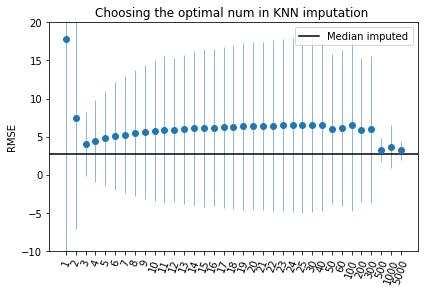

In [27]:
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
fig, ax2 = plt.subplots()

color = 'black'
ax2.set_ylabel('RMSE', color=color)  # we already handled the x-label with ax1
plt.errorbar(range(len(RMSE_mean)), RMSE_mean, yerr=RMSE_std,  fmt='o', elinewidth=0.5)
plt.tick_params(axis='y', labelcolor=color)
plt.xticks(range(len(RMSE_mean)), trialKs, rotation=70)
plt.axhline(2.6980855570220057, color="black", label="Median imputed")
plt.ylim([-10,20])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Choosing the optimal num in KNN imputation ")
plt.legend()
plt.savefig("KNNImputation.png", dpi=400)

# Feature importance

[10:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


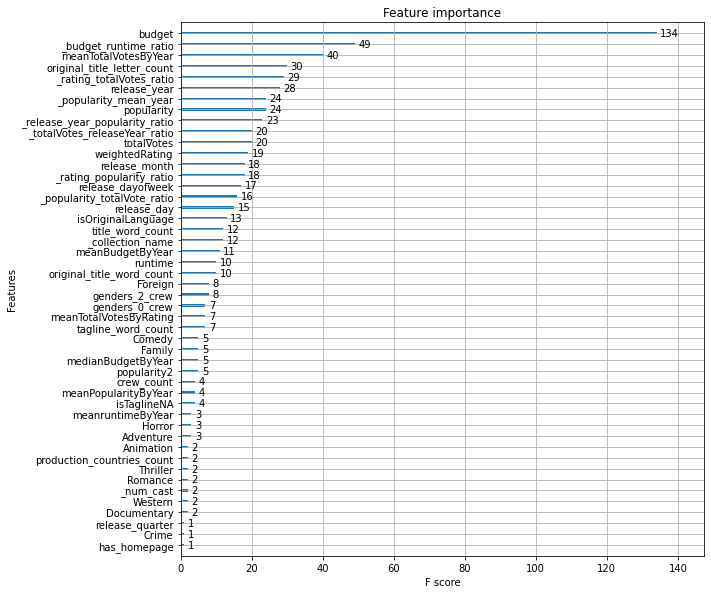

In [28]:
from xgboost import XGBRegressor
from xgboost import plot_importance

def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    plt.tight_layout()
    return plot_importance(booster=booster, ax=ax, **kwargs)

model = XGBRegressor()
model.fit(train, y)
my_plot_importance(model, (8,8))
plt.savefig("FeatureImportance.png", dpi=400)

# Training 



In [29]:
train = pd.read_csv("encodedDataWithAdditionalData_train.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")
y = pd.read_csv("encodedDataWithAdditionalData_train.csv")['revenue']
test = pd.read_csv("encodedDataWithAdditionalData_test.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")
trainInterpolated = pd.read_csv("ImputedData_encodedDataWithAdditionalData_train.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")
yInterpolated = pd.read_csv("ImputedData_encodedDataWithAdditionalData_train.csv")['revenue']
testInterpolated = pd.read_csv("ImputedData_encodedDataWithAdditionalData_test.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")

In [30]:
print(train.columns[np.isnan(train).any()==True])
print(train.columns[np.isinf(train).any()==True])
print(train.columns)
print(y.head())
print(trainInterpolated.columns[np.isnan(trainInterpolated).any()==True])
print(trainInterpolated.columns[np.isinf(trainInterpolated).any()==True])
print(trainInterpolated.columns)
print(y.head())

Index([], dtype='object')
Index([], dtype='object')
Index(['budget', 'popularity', 'runtime', 'popularity2', 'rating',
       'totalVotes', 'release_month', 'release_day', 'release_year',
       'release_dayofweek', 'release_quarter', 'weightedRating',
       'genders_0_crew', 'genders_1_crew', 'genders_2_crew',
       '_collection_name', '_num_Keywords', '_num_cast',
       '_popularity_mean_year', '_budget_runtime_ratio', 'meanBudgetByYear',
       'medianBudgetByYear', '_release_year_popularity_ratio',
       '_release_year_polularity_ratio2', '_popularity_totalVote_ratio',
       '_rating_popularity_ratio', '_rating_totalVotes_ratio',
       '_totalVotes_releaseYear_ratio', 'has_homepage',
       'isbelongs_to_collectionNA', 'isTaglineNA', 'isOriginalLanguage',
       'isTitleDifferent', 'isMovieReleased', 'original_title_letter_count',
       'original_title_word_count', 'title_word_count', 'tagline_word_count',
       'production_countries_count', 'cast_count', 'crew_count',
    

## Modelling
After processing the dataset to get rid of inconsistent values, we create predictive regression models for our problem. The target variable is the log of the revenue, and we consistently check the performance of our models against this variable.

### K-fold Cross-validation
We use k-fold cross-validation with k = 10, for comparing different models and their results. This ensures that we do not make an overly optimistic or pessimistic estimate of our test error, which can happen while working with random splits.
K = 10 is chosen due to the standard convention, and since our dataset size is small, we could efficiently perform this computation in short times.

### Normalisation
Although we don’t have much numeric data, we still perform normalisation on the data while feeding it to models sensitive to scale such as Support Vector Regressions, and Neural Networks. We achieve this by using sklearn’s StandardScaler function, which performs z-score normalisation. We ensure that we don’t leak information about the data by first splitting it and then executing it.
### Metrics:
We mainly have different variants of the squared error between the predicted values and the ground truth for regression problems. Here, we compare the models based on two other metrics:
#### Root Mean Squared Error
(tries to minimise the deviation between ground truth and predicted)
#### R-Squared Error
(a measure of how close the data is to the predicted regression line)
The final Kaggle competition uses the Root-Mean-Squared-Logarithmic-Error (RMSLE) as the evaluation metric, equivalent to our RMSE because we have consistently worked with the log of the revenue. 
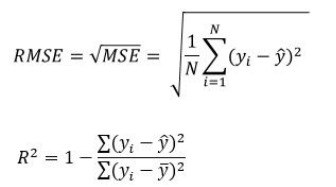

## Baseline Prediction

In [32]:
def LRModelling(trainX, trainY, valX, valY, verbose=False):  
    regr = LinearRegression()
    regr.fit(trainX.values, trainY.values)
    predY = regr.predict(valX)
    return {'rmse': mean_squared_error(valY, predY, squared=False),
            'r2': r2_score(valY, predY)}

def baselinePerformance(train, y):  
  train = pd.DataFrame(train['budget'])
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      print(e + 1, ' fold')
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = LRModelling(trainX, trainY, valX, valY)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('LR Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))

In [33]:
baselinePerformance(train, y)
baselinePerformance(trainInterpolated, yInterpolated)

1  fold
LR Model RMSE: 2.57790 R2: 0.59323 (0.0m)
2  fold
LR Model RMSE: 2.72968 R2: 0.56296 (0.0m)
3  fold
LR Model RMSE: 2.51765 R2: 0.51388 (0.0m)
4  fold
LR Model RMSE: 2.81820 R2: 0.51782 (0.0m)
5  fold
LR Model RMSE: 2.64629 R2: 0.59319 (0.0m)
6  fold
LR Model RMSE: 2.52220 R2: 0.55954 (0.0m)
7  fold
LR Model RMSE: 2.63809 R2: 0.59598 (0.0m)
8  fold
LR Model RMSE: 2.70615 R2: 0.54653 (0.0m)
9  fold
LR Model RMSE: 2.39043 R2: 0.63451 (0.0m)
10  fold
LR Model RMSE: 2.48455 R2: 0.60093 (0.0m)
2.6031140490656917 +/- 0.12237635943492445
0.5718580181590135 +/- 0.036631242366778456
1  fold
LR Model RMSE: 2.61944 R2: 0.58002 (0.0m)
2  fold
LR Model RMSE: 2.83585 R2: 0.52830 (0.0m)
3  fold
LR Model RMSE: 2.58998 R2: 0.48555 (0.0m)
4  fold
LR Model RMSE: 2.88603 R2: 0.49433 (0.0m)
5  fold
LR Model RMSE: 2.75752 R2: 0.55828 (0.0m)
6  fold
LR Model RMSE: 2.64730 R2: 0.51476 (0.0m)
7  fold
LR Model RMSE: 2.75331 R2: 0.55992 (0.0m)
8  fold
LR Model RMSE: 2.74712 R2: 0.53269 (0.0m)
9  fold
LR M

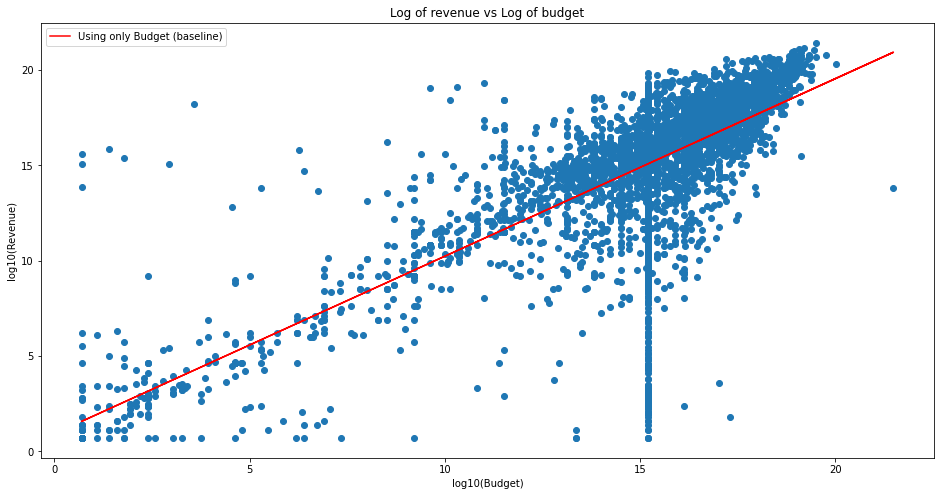

In [34]:
plt.figure(figsize = (16, 8))
m, b = np.polyfit(train['budget'], y, 1)
plt.plot(train['budget'], m*train['budget'] + b, "red", label="Using only Budget (baseline)")
plt.scatter(train['budget'], y)
plt.title('Log of revenue vs Log of budget')
plt.legend()
plt.xlabel('log10(Budget)')
plt.ylabel('log10(Revenue)')
sns.set_context("paper", font_scale = 1.2);
plt.savefig('Baseline.png')

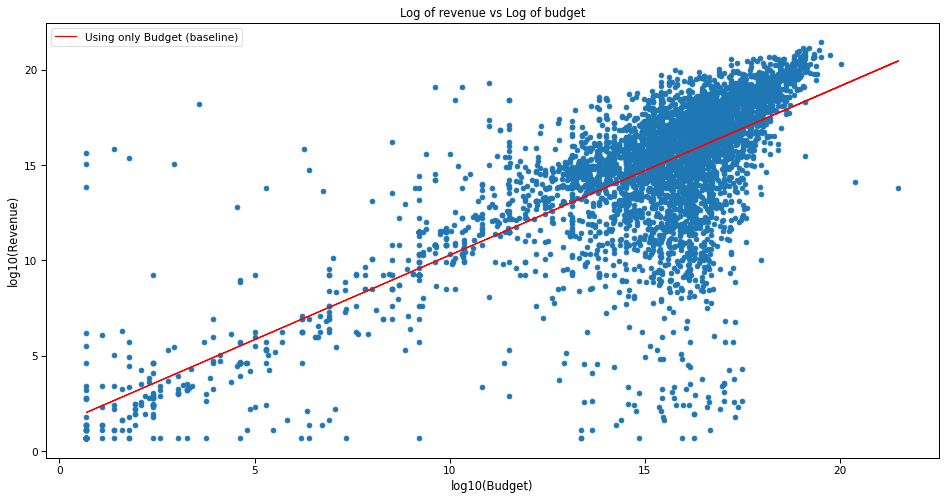

In [35]:
plt.figure(figsize = (16, 8))
m, b = np.polyfit(trainInterpolated['budget'], y, 1)
plt.plot(trainInterpolated['budget'], m*trainInterpolated['budget'] + b, "red", label="Using only Budget (baseline)")
plt.scatter(trainInterpolated['budget'], y)
plt.title('Log of revenue vs Log of budget')
plt.legend()
plt.xlabel('log10(Budget)')
plt.ylabel('log10(Revenue)')
sns.set_context("paper", font_scale = 1.2);
plt.savefig('BaselineInterpolated.png')

## Linear Regression

Error:  2.466494266582579


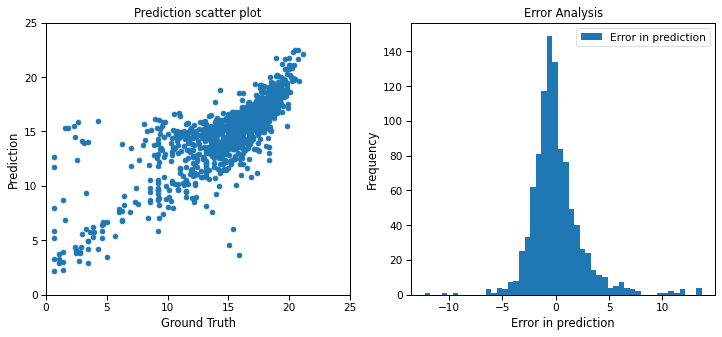

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
import datetime
random_seed = 42
k = 10
          
trainX, testX, trainY, testY = train_test_split(trainInterpolated, yInterpolated, test_size=0.2)
regr = LinearRegression()
regr.fit(trainX, trainY)
predY = regr.predict(testX)
print("Error: ", mean_squared_error(testY, predY, squared=False))

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(testY, predY)
axes[0].set_xlabel("Ground Truth")
axes[0].set_ylabel("Prediction")
axes[0].set_title("Prediction scatter plot")
axes[0].set_ylim([0,25])
axes[0].set_xlim([0,25])

axes[1].hist(predY - testY, bins=50, label=['Error in prediction'])
axes[1].set_xlabel("Error in prediction")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Error Analysis")
axes[1].legend()

In [37]:
params_default = {'objective':'reg:linear',
             'eta': 0.01,
             'max_depth':6,
             'subsample':0.6,
             'colsample_bytree':0.7,
             'eval_metric':'rmse',
             'seed':random_seed,
             'silent':True,
             }

In [38]:
 def LRModelling(trainX, trainY, valX, valY, verbose=False, params = params_default):
    # print(trainX.shape, trainY.shape)
    # print(trainX.isnull().values.any(), trainY.isnull().values.any(), valX.isnull().values.any(), valY.isnull().values.any())    
    regr = LinearRegression()
    regr.fit(trainX.values, trainY.values)
    predY = regr.predict(valX)
    return {'rmse': mean_squared_error(valY, predY, squared=False),
            'r2': r2_score(valY, predY)}


def checkCrossValPerformanceLR(train, y):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      # print(e + 1, ' fold')
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = LRModelling(trainX, trainY, valX, valY)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('LR Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))


In [39]:
checkCrossValPerformanceLR(train, y)
checkCrossValPerformanceLR(trainInterpolated, yInterpolated)

LR Model RMSE: 2.37083 R2: 0.65596 (0.0m)
LR Model RMSE: 2.48526 R2: 0.63772 (0.0m)
LR Model RMSE: 2.29967 R2: 0.59442 (0.0m)
LR Model RMSE: 2.57699 R2: 0.59683 (0.0m)
LR Model RMSE: 4.43366 R2: -0.14193 (0.0m)
LR Model RMSE: 2.35423 R2: 0.61625 (0.0m)
LR Model RMSE: 2.41430 R2: 0.66162 (0.0m)
LR Model RMSE: 2.42160 R2: 0.63688 (0.0m)
LR Model RMSE: 2.19371 R2: 0.69219 (0.0m)
LR Model RMSE: 3.43061 R2: 0.23915 (0.0m)
2.6980855570220057 +/- 0.6636421715304983
0.5189094262661624 +/- 0.25167928423169356
LR Model RMSE: 2.37885 R2: 0.65362 (0.0m)
LR Model RMSE: 2.55371 R2: 0.61749 (0.0m)
LR Model RMSE: 2.36375 R2: 0.57150 (0.0m)
LR Model RMSE: 2.61170 R2: 0.58589 (0.0m)
LR Model RMSE: 4.30025 R2: -0.07424 (0.0m)
LR Model RMSE: 2.43154 R2: 0.59063 (0.0m)
LR Model RMSE: 2.49651 R2: 0.63818 (0.0m)
LR Model RMSE: 2.44240 R2: 0.63061 (0.0m)
LR Model RMSE: 2.24115 R2: 0.67874 (0.0m)
LR Model RMSE: 16.60454 R2: -16.82414 (0.0m)
4.04243966903385 +/- 4.225062101508334
-1.193169748589424 +/- 5.214532

## Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import datetime
random_seed = 42
k = 10
             
def DRModelling(trainX, trainY, valX, valY, verbose=False, params = params_default):
    regr = DecisionTreeRegressor(random_state = random_seed)
    regr.fit(trainX, trainY)
    predY = regr.predict(valX)
    return {'rmse': mean_squared_error(valY, predY, squared=False),
            'r2': r2_score(valY, predY)}

def checkCrossValPerformanceDR(train, y):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = DRModelling(trainX, trainY, valX, valY)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('Decision Tree Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))

checkCrossValPerformanceDR(train, y)

Decision Tree Model RMSE: 3.18644 R2: 0.37852 (0.0m)
Decision Tree Model RMSE: 3.25606 R2: 0.37816 (0.0m)
Decision Tree Model RMSE: 3.09112 R2: 0.26721 (0.0m)
Decision Tree Model RMSE: 3.48102 R2: 0.26434 (0.0m)
Decision Tree Model RMSE: 2.99547 R2: 0.47875 (0.0m)
Decision Tree Model RMSE: 3.35561 R2: 0.22036 (0.0m)
Decision Tree Model RMSE: 3.19482 R2: 0.40746 (0.0m)
Decision Tree Model RMSE: 3.34032 R2: 0.30909 (0.0m)
Decision Tree Model RMSE: 2.64504 R2: 0.55251 (0.0m)
Decision Tree Model RMSE: 3.08246 R2: 0.38574 (0.0m)
3.162834966047089 +/- 0.22088530779959004
0.36421481901226055 +/- 0.09717293913529344


In [41]:
checkCrossValPerformanceDR(trainInterpolated, yInterpolated)

Decision Tree Model RMSE: 3.04518 R2: 0.43240 (0.0m)
Decision Tree Model RMSE: 3.57843 R2: 0.24893 (0.0m)
Decision Tree Model RMSE: 3.07382 R2: 0.27539 (0.0m)
Decision Tree Model RMSE: 3.47499 R2: 0.26689 (0.0m)
Decision Tree Model RMSE: 3.25469 R2: 0.38464 (0.0m)
Decision Tree Model RMSE: 3.38861 R2: 0.20495 (0.0m)
Decision Tree Model RMSE: 3.36710 R2: 0.34184 (0.0m)
Decision Tree Model RMSE: 3.28970 R2: 0.32987 (0.0m)
Decision Tree Model RMSE: 3.34491 R2: 0.28437 (0.0m)
Decision Tree Model RMSE: 3.19385 R2: 0.34055 (0.0m)
3.3011280692914426 +/- 0.15875122076875745
0.3109814111897277 +/- 0.06431368567725664


## Random Forests

Error:  2.3051842476675786


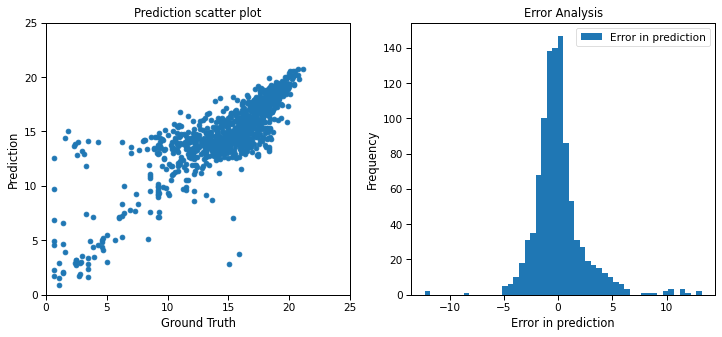

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import datetime
random_seed = 42
k = 10

trainX, testX, trainY, testY = train_test_split(trainInterpolated, yInterpolated, test_size=0.2)
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(trainX, trainY)
predY = regr.predict(testX)
print("Error: ", mean_squared_error(testY, predY, squared=False))

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(testY, predY)
axes[0].set_xlabel("Ground Truth")
axes[0].set_ylabel("Prediction")
axes[0].set_title("Prediction scatter plot")
axes[0].set_ylim([0,25])
axes[0].set_xlim([0,25])

axes[1].hist(predY - testY, bins=50, label=['Error in prediction'])
axes[1].set_xlabel("Error in prediction")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Error Analysis")
axes[1].legend()

In [43]:
def RandomForests(trainX, trainY, valX, valY, verbose=False):
    # print(trainX.shape, trainY.shape)
    regr = RandomForestRegressor(max_depth=10, random_state=0)
    regr.fit(trainX, trainY)
    predY = regr.predict(valX)
    return {'rmse': mean_squared_error(valY, predY, squared=False),
            'r2': r2_score(valY, predY)}


def checkCrossValPerformanceRF(train, y):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      # print(e + 1, ' fold')
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = RandomForests(trainX, trainY, valX, valY)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('Random Forest Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))

In [44]:
checkCrossValPerformanceRF(train, y)
checkCrossValPerformanceRF(trainInterpolated, yInterpolated)

Random Forest Model RMSE: 2.18940 R2: 0.70660 (0.1m)
Random Forest Model RMSE: 2.38768 R2: 0.66561 (0.1m)
Random Forest Model RMSE: 2.14582 R2: 0.64687 (0.1m)
Random Forest Model RMSE: 2.43430 R2: 0.64024 (0.1m)
Random Forest Model RMSE: 2.27129 R2: 0.70032 (0.1m)
Random Forest Model RMSE: 2.37653 R2: 0.60895 (0.1m)
Random Forest Model RMSE: 2.32095 R2: 0.68728 (0.1m)
Random Forest Model RMSE: 2.22809 R2: 0.69259 (0.1m)
Random Forest Model RMSE: 2.08209 R2: 0.72272 (0.1m)
Random Forest Model RMSE: 2.16973 R2: 0.69565 (0.1m)
2.260589051626649 +/- 0.11087858866310057
0.6766832927719632 +/- 0.03350515696383391
Random Forest Model RMSE: 2.21513 R2: 0.69966 (0.1m)
Random Forest Model RMSE: 2.40625 R2: 0.66039 (0.1m)
Random Forest Model RMSE: 2.17765 R2: 0.63632 (0.1m)
Random Forest Model RMSE: 2.50009 R2: 0.62053 (0.1m)
Random Forest Model RMSE: 2.33147 R2: 0.68423 (0.1m)
Random Forest Model RMSE: 2.44622 R2: 0.58568 (0.1m)
Random Forest Model RMSE: 2.39486 R2: 0.66705 (0.1m)
Random Forest 

## Support Vector Regression

Error:  2.502580341220155


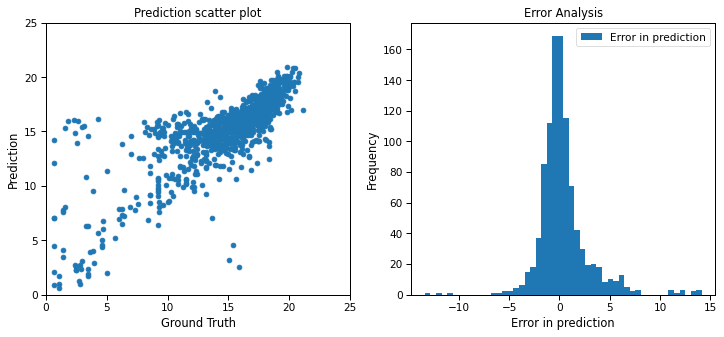

In [45]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import datetime
random_seed = 42
k = 10

trainX, testX, trainY, testY = train_test_split(trainInterpolated, yInterpolated, test_size=0.2)
trainXScaled, trainYScaled, testXScaled, testYScaled, fittedScaler = scaleValuesZScore(trainX, trainY, testX, testY)
regr = SVR(C=1.0, kernel='rbf')
regr.fit(trainXScaled, trainYScaled)
predY = regr.predict(testXScaled)
predY = fittedScaler.scale_[-1]*predY + fittedScaler.mean_[-1]
print("Error: ", mean_squared_error(testY, predY, squared=False))

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(testY, predY)
axes[0].set_xlabel("Ground Truth")
axes[0].set_ylabel("Prediction")
axes[0].set_title("Prediction scatter plot")
axes[0].set_ylim([0,25])
axes[0].set_xlim([0,25])

axes[1].hist(predY - testY, bins=50, label=['Error in prediction'])
axes[1].set_xlabel("Error in prediction")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Error Analysis")
axes[1].legend()

In [46]:
def SVRModelling(trainX, trainY, valX, valY, verbose=False):
    trainX, trainY, scaledValX, scaledValY, fittedScaler = scaleValuesZScore(trainX, trainY, valX, valY)
    regr = SVR()
    regr.fit(trainX, trainY)
    predY = regr.predict(scaledValX)
    unscaledPredY = fittedScaler.scale_[-1]*predY + fittedScaler.mean_[-1]
    return {'rmse': mean_squared_error(valY, unscaledPredY, squared=False),
            'r2': r2_score(valY, unscaledPredY)}

def checkCrossValPerformanceSVR(train, y):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      # print(e + 1, ' fold')
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = SVRModelling(trainX, trainY, valX, valY)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('SVR Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))

In [47]:
checkCrossValPerformanceSVR(train, y)
checkCrossValPerformanceSVR(trainInterpolated, yInterpolated)

SVR Model RMSE: 2.37592 R2: 0.65448 (0.05m)
SVR Model RMSE: 2.56519 R2: 0.61405 (0.05m)
SVR Model RMSE: 2.27125 R2: 0.60438 (0.05m)
SVR Model RMSE: 2.55830 R2: 0.60266 (0.05m)
SVR Model RMSE: 2.50585 R2: 0.63523 (0.05m)
SVR Model RMSE: 2.44212 R2: 0.58706 (0.05m)
SVR Model RMSE: 2.47440 R2: 0.64456 (0.05m)
SVR Model RMSE: 2.44637 R2: 0.62941 (0.05m)
SVR Model RMSE: 2.21816 R2: 0.68530 (0.05m)
SVR Model RMSE: 2.18965 R2: 0.69004 (0.05m)
2.404718884138033 +/- 0.12932871542572677
0.634716268078302 +/- 0.032834861067171345
SVR Model RMSE: 2.36675 R2: 0.65714 (0.05m)
SVR Model RMSE: 2.59011 R2: 0.60651 (0.05m)
SVR Model RMSE: 2.27061 R2: 0.60460 (0.05m)
SVR Model RMSE: 2.57343 R2: 0.59794 (0.05m)
SVR Model RMSE: 2.56072 R2: 0.61908 (0.05m)
SVR Model RMSE: 2.48978 R2: 0.57079 (0.05m)
SVR Model RMSE: 2.50990 R2: 0.63429 (0.05m)
SVR Model RMSE: 2.46125 R2: 0.62489 (0.05m)
SVR Model RMSE: 2.22684 R2: 0.68283 (0.05m)
SVR Model RMSE: 2.21659 R2: 0.68237 (0.05m)
2.42659944345455 +/- 0.137961349272

## Neural network Regression


In [48]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
!pip install plot_keras_history
from plot_keras_history import plot_history
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.26-cp36-none-any.whl size=6516 sha256=9c087f88d4ce5430e78cba978b721c166f00c19ad866057ba86c09114bfdc0ab
  Stored in directory: /root/.cache/pip/wheels/f5/6f/f1/84c54c13581bfe1ea75ff56743cb31707f552eabe682e9714a
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.23-cp36-none-any.whl size=6987 sha256=74fae490a47174e0618c0301e846d9127d5de5599135e2dff671bd6aa1533663
  Stored in directory: /root/.cache/pip/wheels/d2/b5/7d/a51cd1ac4ee246a7b59bcea6b37e768d9976ca5aa5918e7cd9
  Created wheel for compress-json: filename=compress_json-1.0.4-cp36-none-any.whl size=4585 sha256=cf486a84f78cf5c088e7291af24479a18eb33cd44c26f1f95cd1d929e4cb8875
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


Epoch 00046: early stopping


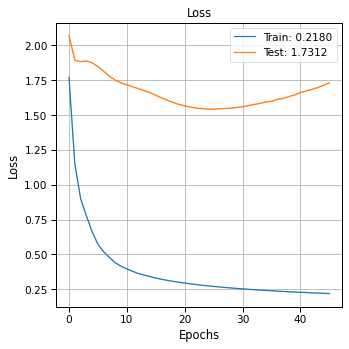

In [49]:
def baseline_modelInterpolated():
  model = Sequential()
  model.add(Dense(50, input_dim=trainInterpolated.shape[1], activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

trainScaled, yScaled, _, _, fittedScaler = scaleValuesZScore(trainInterpolated, yInterpolated, trainInterpolated, yInterpolated)
regr = KerasRegressor(build_fn=baseline_modelInterpolated, epochs=500, batch_size=512, verbose=0)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = regr.fit(trainScaled, yScaled, validation_split=0.5, epochs=4000, callbacks=[es])
plot_history(history.history)

In [50]:
import datetime
random_seed = 42
k = 10
    
def NNModelling(trainX, trainY, valX, valY, model, verbose=False):
    trainX, trainY,scaledValX, scaledValY, fittedScaler = scaleValuesZScore(trainX, trainY, valX, valY)
    regr = KerasRegressor(build_fn=model, epochs=50, batch_size=512, verbose=0)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=20)
    regr.fit(trainX, trainY, validation_split=0.15, epochs=4000, callbacks=[es])
    predY = regr.predict(scaledValX)
    unscaledPredY = fittedScaler.scale_[-1]*predY + fittedScaler.mean_[-1]
    return {'rmse': mean_squared_error(valY, unscaledPredY, squared=False),
            'r2': r2_score(valY, unscaledPredY)}


def checkCrossValPerformanceNN(train, y, model_):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      # print(e + 1, ' fold')
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = NNModelling(trainX, trainY, valX, valY, model=model_)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('NN Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))

In [51]:
def baseline_model():
	model = Sequential()
	model.add(Dense(50, input_dim=train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def baseline_modelInterpolated():
	model = Sequential()
	model.add(Dense(50, input_dim=trainInterpolated.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

checkCrossValPerformanceNN(train, y, model_ = baseline_model)
checkCrossValPerformanceNN(trainInterpolated, yInterpolated, model_ = baseline_modelInterpolated)

NN Model RMSE: 2.32965 R2: 0.66780 (0.08333333333333333m)
NN Model RMSE: 2.47096 R2: 0.64188 (0.06666666666666667m)
NN Model RMSE: 2.23765 R2: 0.61600 (0.06666666666666667m)
NN Model RMSE: 2.57538 R2: 0.59733 (0.1m)
NN Model RMSE: 2.34058 R2: 0.68176 (0.08333333333333333m)
NN Model RMSE: 2.40072 R2: 0.60094 (0.1m)
NN Model RMSE: 2.39144 R2: 0.66800 (0.1m)
NN Model RMSE: 2.39402 R2: 0.64510 (0.06666666666666667m)
NN Model RMSE: 2.19411 R2: 0.69208 (0.1m)
NN Model RMSE: 2.46657 R2: 0.60669 (0.08333333333333333m)
2.380108174496283 +/- 0.10658471332985742
0.6417579287604174 +/- 0.03323156236929421
NN Model RMSE: 2.26164 R2: 0.68692 (0.1m)
NN Model RMSE: 2.52848 R2: 0.62501 (0.1m)
NN Model RMSE: 2.23728 R2: 0.61613 (0.08333333333333333m)
NN Model RMSE: 2.60048 R2: 0.58944 (0.1m)
NN Model RMSE: 2.38569 R2: 0.66937 (0.11666666666666667m)
NN Model RMSE: 2.43162 R2: 0.59061 (0.11666666666666667m)
NN Model RMSE: 2.47625 R2: 0.64403 (0.11666666666666667m)
NN Model RMSE: 2.43523 R2: 0.63278 (0.116

In [52]:
def tanh_model():
	model = Sequential()
	model.add(Dense(50, input_dim=train.shape[1], kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def tanh_modelInterpolated():
	model = Sequential()
	model.add(Dense(50, input_dim=trainInterpolated.shape[1], kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

checkCrossValPerformanceNN(train, y, model_ = tanh_model)
checkCrossValPerformanceNN(trainInterpolated, yInterpolated, model_ = tanh_modelInterpolated)

NN Model RMSE: 2.36930 R2: 0.65640 (0.11666666666666667m)
NN Model RMSE: 2.50431 R2: 0.63215 (0.13333333333333333m)
NN Model RMSE: 2.26498 R2: 0.60656 (0.15m)
NN Model RMSE: 2.55992 R2: 0.60215 (0.1m)
NN Model RMSE: 2.34070 R2: 0.68172 (0.1m)
NN Model RMSE: 2.37246 R2: 0.61029 (0.06666666666666667m)
NN Model RMSE: 2.40944 R2: 0.66298 (0.13333333333333333m)
NN Model RMSE: 2.39669 R2: 0.64431 (0.1m)
NN Model RMSE: 2.17485 R2: 0.69746 (0.1m)
NN Model RMSE: 2.21926 R2: 0.68160 (0.1m)
2.3611901024947897 +/- 0.11326979345473293
0.6475627172179234 +/- 0.032422537906797555
NN Model RMSE: 2.31684 R2: 0.67144 (0.08333333333333333m)
NN Model RMSE: 2.55593 R2: 0.61683 (0.13333333333333333m)
NN Model RMSE: 2.30218 R2: 0.59353 (0.16666666666666666m)
NN Model RMSE: 2.58221 R2: 0.59519 (0.13333333333333333m)
NN Model RMSE: 2.39259 R2: 0.66745 (0.11666666666666667m)
NN Model RMSE: 2.42846 R2: 0.59167 (0.11666666666666667m)
NN Model RMSE: 2.49199 R2: 0.63949 (0.11666666666666667m)
NN Model RMSE: 2.44381

In [53]:
def sigmoid_model():
	model = Sequential()
	model.add(Dense(50, input_dim=train.shape[1], kernel_initializer='normal', activation='sigmoid'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def sigmoid_modelInterpolated():
	model = Sequential()
	model.add(Dense(50, input_dim=trainInterpolated.shape[1], kernel_initializer='normal', activation='sigmoid'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

checkCrossValPerformanceNN(train, y, model_ = sigmoid_model)
checkCrossValPerformanceNN(trainInterpolated, yInterpolated, model_ = sigmoid_modelInterpolated)

NN Model RMSE: 2.33670 R2: 0.66579 (0.2m)
NN Model RMSE: 2.48085 R2: 0.63901 (0.23333333333333334m)
NN Model RMSE: 2.25265 R2: 0.61083 (0.2m)
NN Model RMSE: 2.54243 R2: 0.60757 (0.18333333333333332m)
NN Model RMSE: 2.31520 R2: 0.68862 (0.2m)
NN Model RMSE: 2.35832 R2: 0.61491 (0.2m)
NN Model RMSE: 2.40702 R2: 0.66366 (0.2m)
NN Model RMSE: 2.39370 R2: 0.64520 (0.18333333333333332m)
NN Model RMSE: 2.16818 R2: 0.69932 (0.25m)
NN Model RMSE: 2.24446 R2: 0.67433 (0.18333333333333332m)
2.3499515237088637 +/- 0.10697916812432383
0.6509235061558132 +/- 0.031068078418100914
NN Model RMSE: 2.30961 R2: 0.67349 (0.23333333333333334m)
NN Model RMSE: 2.53974 R2: 0.62166 (0.25m)
NN Model RMSE: 2.26818 R2: 0.60545 (0.21666666666666667m)
NN Model RMSE: 2.55830 R2: 0.60265 (0.25m)
NN Model RMSE: 2.35654 R2: 0.67740 (0.3333333333333333m)
NN Model RMSE: 2.43268 R2: 0.59025 (0.23333333333333334m)
NN Model RMSE: 2.46759 R2: 0.64652 (0.3m)
NN Model RMSE: 2.40685 R2: 0.64129 (0.25m)
NN Model RMSE: 2.20386 R2:

## XGBoost

[10:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Error:  2.3354915848491444


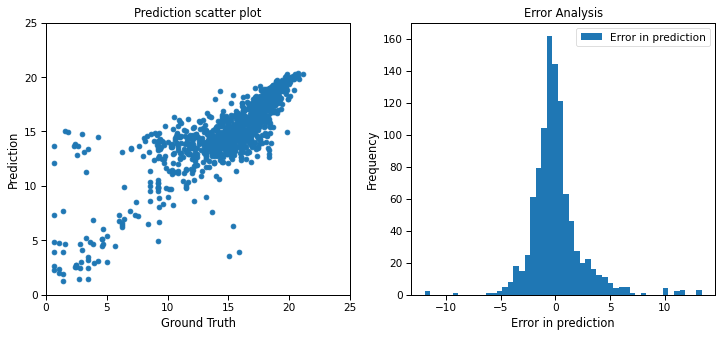

In [54]:
import datetime
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
random_seed = 42
k = 10
import xgboost as xgb
  
trainX, testX, trainY, testY = train_test_split(trainInterpolated, yInterpolated, test_size=0.2)
regr = XGBRegressor()
regr.fit(trainX, trainY)
predY = regr.predict(testX)
print("Error: ", mean_squared_error(testY, predY, squared=False))

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(testY, predY)
axes[0].set_xlabel("Ground Truth")
axes[0].set_ylabel("Prediction")
axes[0].set_title("Prediction scatter plot")
axes[0].set_ylim([0,25])
axes[0].set_xlim([0,25])

axes[1].hist(predY - testY, bins=50, label=['Error in prediction'])
axes[1].set_xlabel("Error in prediction")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Error Analysis")
axes[1].legend()

In [55]:
def XGBModel(trainX, trainY, valX, valY, verbose=False, params = params_default):
    record = dict()
    # print(f'Going into training: {trainX.shape}, {trainY.shape}, {valX.shape}, {valY.shape}')
    model = xgb.train(params,
                     xgb.DMatrix(trainX, trainY),
                     100000,
                     [(xgb.DMatrix(trainX, trainY), 'train'), 
                     (xgb.DMatrix(valX, valY), 'valid')],
                     verbose_eval = verbose,
                     early_stopping_rounds = 500,
                  )
    predY = model.predict(xgb.DMatrix(valX))
    return {'rmse': mean_squared_error(valY, predY, squared=False),
            'r2': r2_score(valY, predY)}

def checkCrossValPerformanceXGB(train, y, params_ = params_default):  
  fold = list(KFold(k, shuffle=True, random_state=random_seed).split(train))
  np.random.seed(random_seed)
  foldRMSE = []
  foldR2 = []
  for e, (trainSet, valSet) in enumerate(fold):
      # print(e + 1, ' fold')
      trainX = train.loc[trainSet, :]
      trainY = y[trainSet]
      valX = train.loc[valSet, :]
      valY = y[valSet]    
      start = datetime.datetime.now()
      result = XGBModel(trainX, trainY, valX, valY, params_)
      foldRMSE.append(result['rmse'])
      foldR2.append(result['r2'])
      print('XGB Model' , 'RMSE: {0:.5f}'.format(result['rmse']), "R2: {0:.5f}".format(result['r2']), '(' + str(((datetime.datetime.now() - start).seconds/60)) + 'm)')
  print(np.mean(foldRMSE), "+/-", np.std(foldRMSE))
  print(np.mean(foldR2), "+/-", np.std(foldR2))

In [56]:
checkCrossValPerformanceXGB(train, y)
checkCrossValPerformanceXGB(trainInterpolated, yInterpolated)

Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 500 rounds.
Stopping. Best iteration:
[596]	train-rmse:1.60205	valid-rmse:2.15591

XGB Model RMSE: 2.16585 R2: 0.71287 (0.36666666666666664m)
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 500 rounds.
Stopping. Best iteration:
[1479]	train-rmse:1.04009	valid-rmse:2.30501

XGB Model RMSE: 2.31224 R2: 0.68641 (0.65m)
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 500 rounds.
Stopping. Best iteration:
[1136]	train-rmse:1.2383	valid-rmse:2.09479

XGB Model RMSE: 2.09623 R2: 0.66300 (0.5333333333333333m)
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 500 rounds.
Stopping. Best iteration:
[2065]	train-rm

# Final Summary

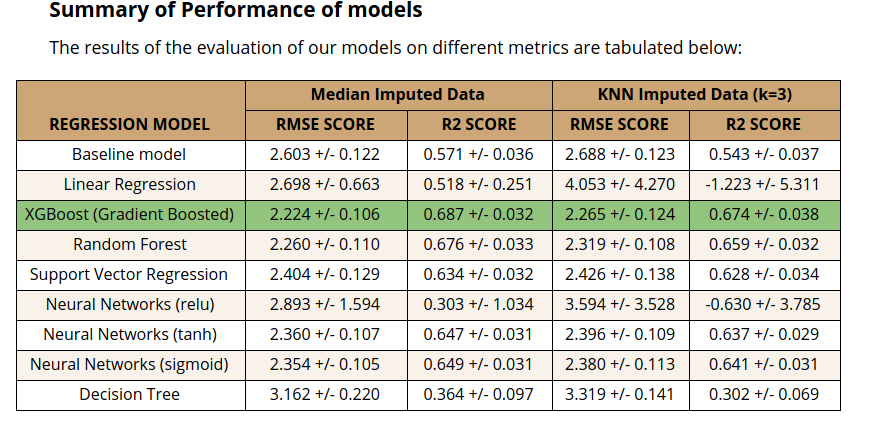

# Final Submission

In [63]:
trainInterpolated = pd.read_csv("ImputedData_encodedDataWithAdditionalData_train.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")
yInterpolated = pd.read_csv("ImputedData_encodedDataWithAdditionalData_train.csv")['revenue']
testInterpolated = pd.read_csv("ImputedData_encodedDataWithAdditionalData_test.csv").drop(['revenue', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors="ignore")

In [64]:
params_default = {'objective':'reg:linear',
             'eta': 0.01,
             'max_depth':6,
             'subsample':0.6,
             'colsample_bytree':0.7,
             'eval_metric':'rmse',
             'seed':random_seed,
             'silent':True,
             }

xgb_model = XGBRegressor()
xgb_model.fit(trainInterpolated, yInterpolated)

[17:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [65]:
predictions = xgb_model.predict(testInterpolated)

In [66]:
predictions

array([15.907991, 14.210908, 16.6772  , ..., 16.642178, 17.249622,
       15.009524], dtype=float32)

In [67]:
sub = pd.read_csv('sample_submission.csv')
reve = np.expm1(predictions)
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = reve
df_sub

,id,revenue
0,3001,8.104996e+06
1,3002,1.484973e+06
2,3003,1.749106e+07
3,3004,1.059564e+07
4,3005,1.149156e+06
...,...,...
4393,7394,3.882426e+07
4394,7395,1.444836e+07
4395,7396,1.688908e+07
4396,7397,3.100386e+07


In [68]:
df_sub.to_csv('submission_1.csv', index=False)